In [12]:
import pandas as pd

data = pd.read_csv('bank.csv', delimiter=';')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


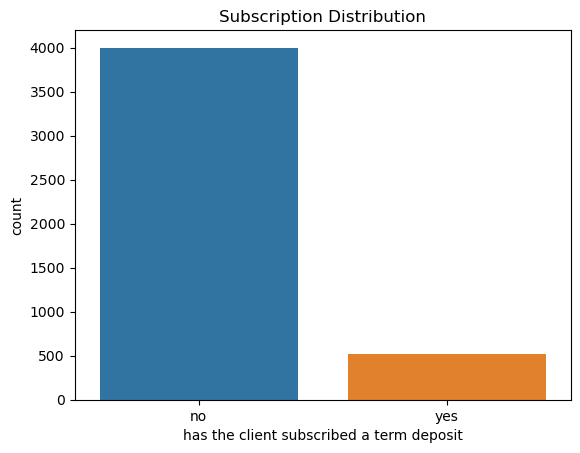

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='y', data=data)
plt.xlabel("has the client subscribed a term deposit")
plt.title('Subscription Distribution')
plt.show()


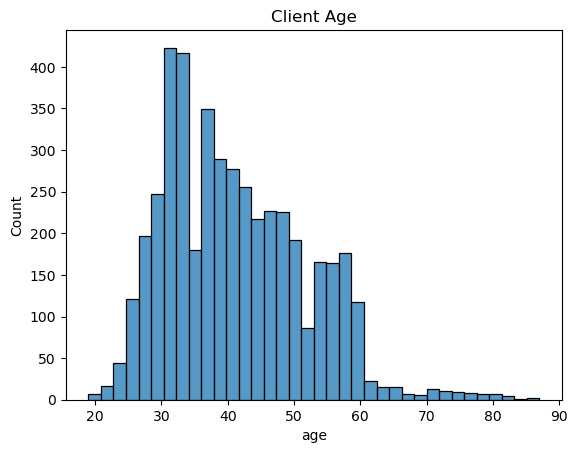

In [14]:
sns.histplot(x='age', data=data)
plt.title('Client Age')
plt.show()

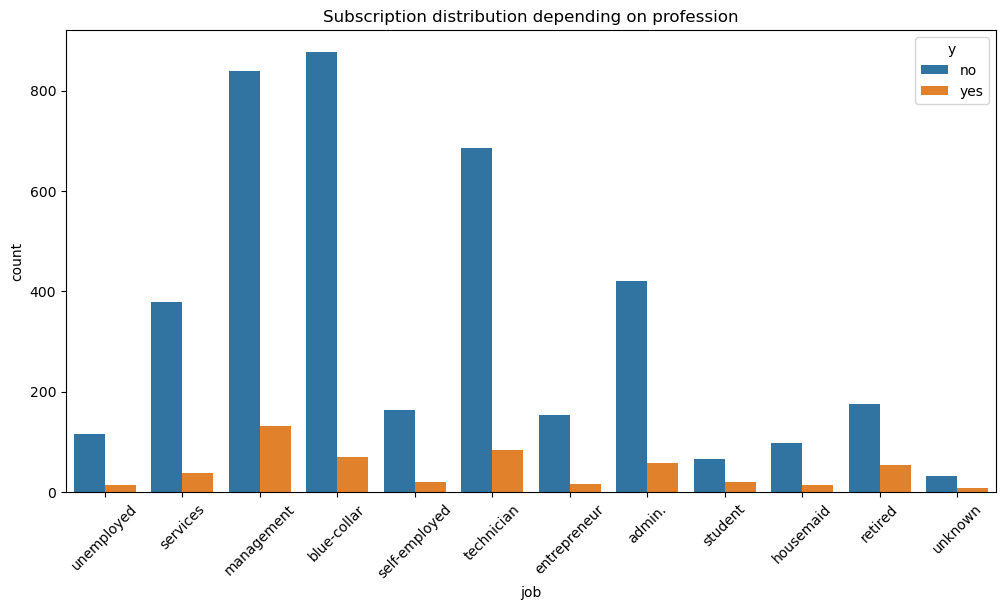

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=data)
plt.title('Subscription distribution depending on profession')
plt.xticks(rotation=45)
plt.show()

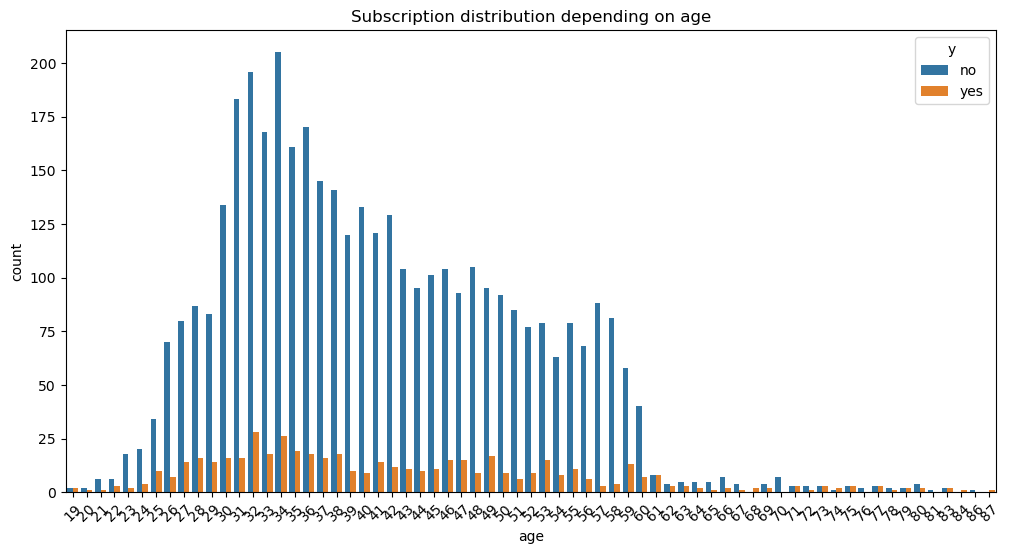

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='y', data=data)
plt.title('Subscription distribution depending on age')
plt.xticks(rotation=45)
plt.show()

In [17]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import time

data = pd.read_csv('bank.csv', delimiter=';')


# Wybór cech numerycznych do analizy
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Podział danych na cechy (X) i etykiety (y)
X = data[numerical_features]
y = data['y']

# Mapowanie wartości tekstowych na wartości liczbowe
X = pd.get_dummies(X, drop_first=True)
y = pd.get_dummies(y, drop_first=True)

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicjalizacja i trening modelu klasyfikacyjnego
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

# Przygotowanie listy na czasy wykonania
training_times = []

# Przygotowanie list na wyniki metryk
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

# Iteracja po różnych rozmiarach zbioru testowego
for size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    # Podział danych na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=size, random_state=42)

    # Pomiar czasu trwania treningu
    start_time = time.time()
    model.fit(X_train, y_train.values.ravel())
    end_time = time.time()

    # Ewaluacja modelu
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Dodanie czasu do listy
    training_times.append(end_time - start_time)

    # Dodanie wyników metryk do list
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

# Wyświetlenie wyników
for size, time_taken, accuracy, precision, recall, f1, roc_auc in zip(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    training_times,
    accuracy_list,
    precision_list,
    recall_list,
    f1_list,
    roc_auc_list,
):
    print(
        f"Test Data Size: {size}, Time Taken: {time_taken:.2f} seconds, "
        f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
        f"Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}"
    )

#Tworzenie wykresu zmiany czasu wykonania dla danych testowych
#plt.figure(figsize=(10, 6))

# Wykres czasu wykonania
#plt.subplot(2, 1, 1)
#plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], training_times, marker='o')
#plt.title('Change in Training Time with Test Data Size')
#plt.xlabel('Test Data Size (Fraction of Total Data)')
#plt.ylabel('Training Time (seconds)')




Test Data Size: 0.1, Time Taken: 8.78 seconds, Accuracy: 0.8808, Precision: 0.3939, Recall: 0.2766, F1-Score: 0.3250, ROC-AUC: 0.7991
Test Data Size: 0.2, Time Taken: 7.71 seconds, Accuracy: 0.8740, Precision: 0.3857, Recall: 0.2755, F1-Score: 0.3214, ROC-AUC: 0.8025
Test Data Size: 0.3, Time Taken: 5.07 seconds, Accuracy: 0.8814, Precision: 0.4286, Recall: 0.1776, F1-Score: 0.2512, ROC-AUC: 0.7525
Test Data Size: 0.4, Time Taken: 6.88 seconds, Accuracy: 0.8756, Precision: 0.3676, Recall: 0.2646, F1-Score: 0.3077, ROC-AUC: 0.7664
Test Data Size: 0.5, Time Taken: 5.05 seconds, Accuracy: 0.8704, Precision: 0.3925, Recall: 0.3401, F1-Score: 0.3644, ROC-AUC: 0.7779
Test Data Size: 0.6, Time Taken: 2.12 seconds, Accuracy: 0.8868, Precision: 0.4919, Recall: 0.2000, F1-Score: 0.2844, ROC-AUC: 0.8185
Test Data Size: 0.7, Time Taken: 3.25 seconds, Accuracy: 0.8547, Precision: 0.3388, Recall: 0.2845, F1-Score: 0.3093, ROC-AUC: 0.7331
Test Data Size: 0.8, Time Taken: 3.54 seconds, Accuracy: 0.868

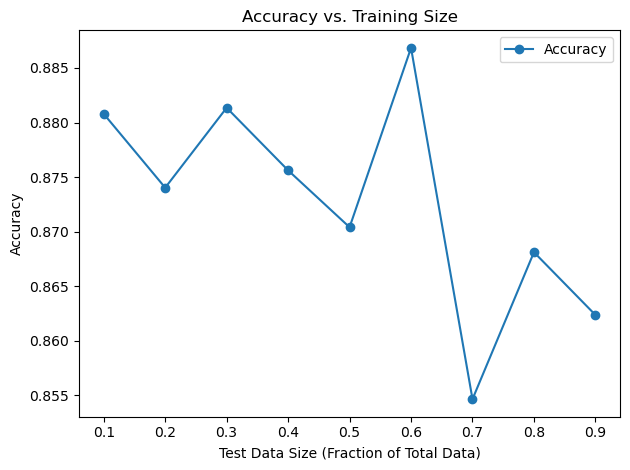

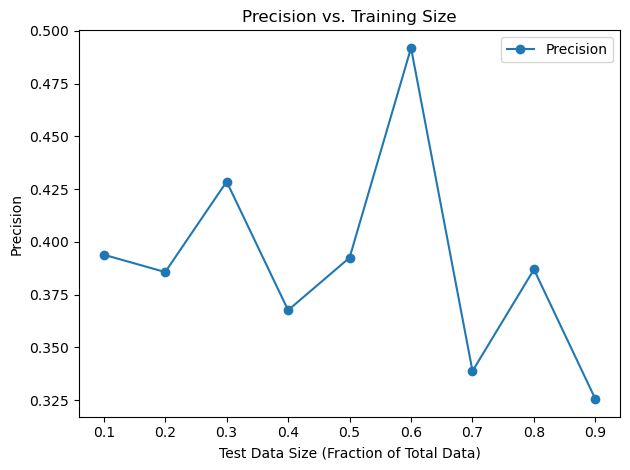

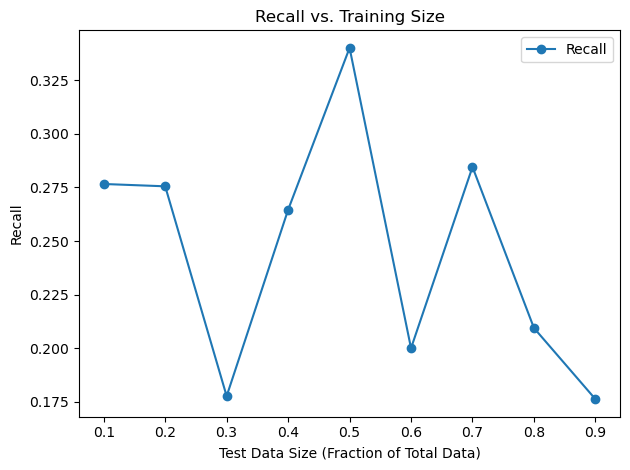

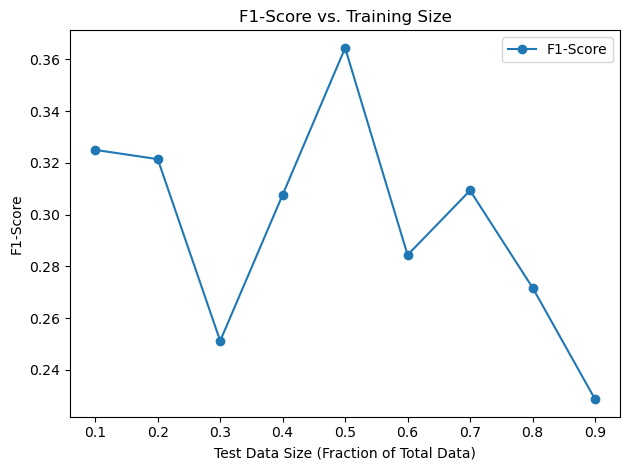

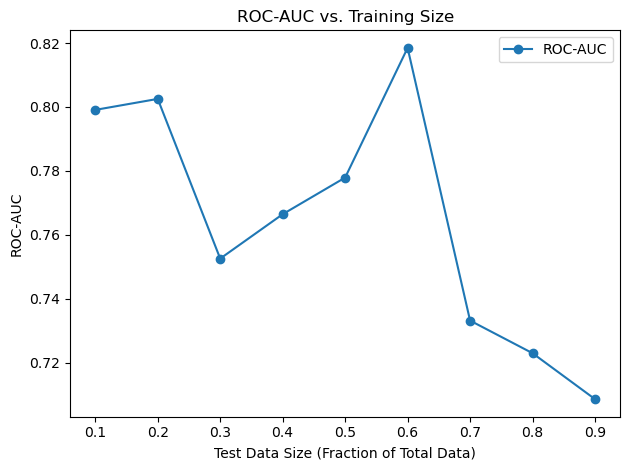

In [18]:
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], accuracy_list, marker='o', label='Accuracy')

plt.title('Accuracy vs. Training Size')
plt.xlabel('Test Data Size (Fraction of Total Data)')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], precision_list, marker='o', label='Precision')

plt.title('Precision vs. Training Size')
plt.xlabel('Test Data Size (Fraction of Total Data)')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()

plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], recall_list, marker='o', label='Recall')

plt.title('Recall vs. Training Size')
plt.xlabel('Test Data Size (Fraction of Total Data)')
plt.ylabel('Recall')
plt.legend()
plt.tight_layout()
plt.show()

plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], f1_list, marker='o', label='F1-Score')

plt.title('F1-Score vs. Training Size')
plt.xlabel('Test Data Size (Fraction of Total Data)')
plt.ylabel('F1-Score')
plt.legend()
plt.tight_layout()
plt.show()

plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], roc_auc_list, marker='o', label='ROC-AUC')

plt.title('ROC-AUC vs. Training Size')
plt.xlabel('Test Data Size (Fraction of Total Data)')
plt.ylabel('ROC-AUC')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
# Importowanie niezbędnych bibliotek
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import time

data = pd.read_csv('bank.csv', delimiter=';')

# Wybór cech numerycznych do analizy
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Podział danych na cechy (X) i etykiety (y)
X = data[numerical_features]
y = data['y']

# Mapowanie wartości tekstowych na wartości liczbowe
X = pd.get_dummies(X, drop_first=True)
y = pd.get_dummies(y, drop_first=True)

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicjalizacja modelu klasyfikacyjnego
model = MLPClassifier(max_iter=1000, random_state=42)

# Przygotowanie listy na czasy wykonania
training_times = []

# Przygotowanie list na wyniki metryk
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

# Iteracja po różnych rozmiarach zbioru testowego
for size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    # Podział danych na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=size, random_state=42)

    # Pomiar czasu trwania treningu
    start_time = time.time()
    
    param_grid = {
        'hidden_layer_sizes': [(16, 32), (64, 32), (128,64)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
    }
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train.values.ravel())

    end_time = time.time()

    # Ewaluacja modelu
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])

    # Dodanie czasu do listy
    training_times.append(end_time - start_time)

    # Dodanie wyników metryk do list
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    
    print(f"Best Parameters (Test Data Size: {size}): {grid_search.best_params_}") 
    

# Wyświetlenie wyników
for size, time_taken, accuracy, precision, recall, f1, roc_auc in zip(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    training_times,
    accuracy_list,
    precision_list,
    recall_list,
    f1_list,
    roc_auc_list,
):
    print(
        f"Test Data Size: {size}, Time Taken: {time_taken:.2f} seconds, "
        f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
        f"Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}"
    )

    

Best Parameters (Test Data Size: 0.1): {'alpha': 0.01, 'hidden_layer_sizes': (16, 32), 'learning_rate': 'constant'}
Best Parameters (Test Data Size: 0.2): {'alpha': 0.01, 'hidden_layer_sizes': (16, 32), 'learning_rate': 'constant'}
Best Parameters (Test Data Size: 0.3): {'alpha': 0.01, 'hidden_layer_sizes': (16, 32), 'learning_rate': 'constant'}
Best Parameters (Test Data Size: 0.4): {'alpha': 0.001, 'hidden_layer_sizes': (16, 32), 'learning_rate': 'constant'}
Best Parameters (Test Data Size: 0.5): {'alpha': 0.01, 'hidden_layer_sizes': (16, 32), 'learning_rate': 'constant'}
Best Parameters (Test Data Size: 0.6): {'alpha': 0.0001, 'hidden_layer_sizes': (16, 32), 'learning_rate': 'constant'}


D:\Programy\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters (Test Data Size: 0.7): {'alpha': 0.01, 'hidden_layer_sizes': (16, 32), 'learning_rate': 'constant'}
Best Parameters (Test Data Size: 0.8): {'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant'}
Best Parameters (Test Data Size: 0.9): {'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant'}
Test Data Size: 0.1, Time Taken: 361.55 seconds, Accuracy: 0.8808, Precision: 0.3793, Recall: 0.2340, F1-Score: 0.2895, ROC-AUC: 0.8149
Test Data Size: 0.2, Time Taken: 381.60 seconds, Accuracy: 0.8829, Precision: 0.4200, Recall: 0.2143, F1-Score: 0.2838, ROC-AUC: 0.8488
Test Data Size: 0.3, Time Taken: 254.86 seconds, Accuracy: 0.8828, Precision: 0.4545, Recall: 0.2303, F1-Score: 0.3057, ROC-AUC: 0.8085
Test Data Size: 0.4, Time Taken: 236.31 seconds, Accuracy: 0.8889, Precision: 0.4434, Recall: 0.2487, F1-Score: 0.3186, ROC-AUC: 0.8028
Test Data Size: 0.5, Time Taken: 105.42 seconds, Accuracy: 0.8859, Precision: 0.4604, Recall: 0.2591, F1